In [12]:
"""
House Price Prediction using SGD Regressor
===========================================
This script uses a Stochastic Gradient Descent (SGD) regressor to predict house prices
based on selected features such as lot size, number of bedrooms, and number of bathrooms.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

Dependencies:
- pandas: For data loading and manipulation.
- scikit-learn: For regression, data splitting, and evaluation metrics.
- matplotlib & seaborn: For visualizing predictions and residuals.

Data Source:
The dataset is publicly available and contains house pricing data.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
# Validierungsdaten laden
validation_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Validierungsdaten_long.csv')
validation_data


,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,2017-08-01,166.135486,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
1,2017-08-02,155.022099,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
2,2017-08-03,159.575340,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
3,2017-08-04,161.585239,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
4,2017-08-05,198.088094,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2017-12-21,87.471228,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1837,2017-12-22,71.911652,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1838,2017-12-23,84.062223,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1839,2017-12-24,60.981969,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,0,0,0,0


In [14]:
#Load the data
training_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Trainingsdaten_long.csv') 

# Max value scaling
# training_data['VPI'] = training_data['VPI'] / 106.2

# vpi_scaler = StandardScaler()
# training_data['VPI_standardized'] = vpi_scaler.fit_transform(training_data[['VPI']])

# # Let's compare both scalings
# comparison = pd.DataFrame({
#     'Standard_scaled': training_data['VPI_standardized'],
#     'Max_scaled': training_data['VPI_max_scaled']
# }).describe()

# print(comparison)

# Standardize only VPI


training_data



,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,0.068,1.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,0,1,0,0,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,1,0,0,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0


In [15]:
# Standardize only VPI

# validation_data['VPI'] = vpi_scaler.transform(validation_data[['VPI']])
# validation_data['VPI'] = validation_data['VPI'] / 106.2
validation_data

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,2017-08-01,166.135486,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
1,2017-08-02,155.022099,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
2,2017-08-03,159.575340,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
3,2017-08-04,161.585239,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
4,2017-08-05,198.088094,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2017-12-21,87.471228,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1837,2017-12-22,71.911652,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1838,2017-12-23,84.062223,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1839,2017-12-24,60.981969,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,0,0,0,0


In [16]:
# Select features and target variable

features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 
            'Temp_Very_Cold', 'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 
            #'Cloud_Clear', 'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate', 'Wind_Strong', 
            'Weather_Good', 'Weather_Light_Issues', 'Weather_Moderate', 'Weather_Severe', 
            'KielerWoche', 
            'Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag', 
            'VPI', 
            'Number_of_ships', 'Ship', 
            #'Heimspiel', 
            'Feiertag', 
            #'is_holiday', 
            #'Weihnachtsmarkt', 
            'Markt'
            ]
X_train = training_data[features]
y_train = training_data['Umsatz']  # Target variable: Umsatz

X_test = validation_data[features]
y_test = validation_data['Umsatz']

In [17]:
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.3)
sgd_model.fit(X_train, y_train)

SGDRegressor(eta0=0.3)

In [18]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [139.32605157 125.39012296 136.01605789 106.74951955 180.86116565]


In [19]:
# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 51.80
Mean Squared Error (MSE): 5574.36
Mean Absolute Percentage Error (MAPE): 31.18%


/tmp/ipykernel_81308/1857845646.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


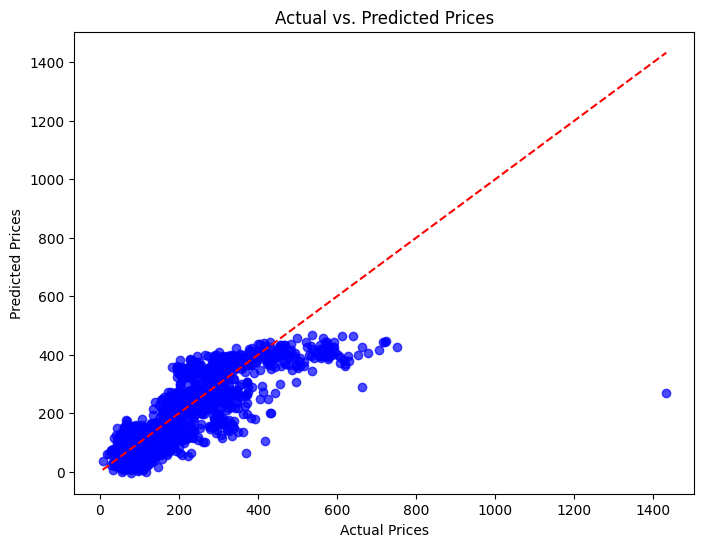

In [20]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [21]:
#Load the test-data

test_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Testdaten.csv')

# Standardize only VPI
# test_data['VPI'] = vpi_scaler.transform(test_data[['VPI']])
# test_data['VPI'] = test_data['VPI'] / 106.2
test_data['VPI'].describe()
test_data


,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,1808011,2018-08-01,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
1,1808021,2018-08-02,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
2,1808031,2018-08-03,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
3,1808041,2018-08-04,1,0,0,0,0,0,0,0,...,NaN,1.0,1,0,0,1,0,0,0,0
4,1808051,2018-08-05,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,1812226,2018-12-22,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,1,0,0,0
1826,1812236,2018-12-23,0,0,0,0,0,1,0,1,...,NaN,0.0,0,1,0,1,1,0,0,0
1827,1812246,2018-12-24,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,0,0,0,0
1828,1812276,2018-12-27,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,0,0,0,0


In [22]:
test_data_copy = test_data[features]

# Make predictions on the test set

sgd_predictions = sgd_model.predict(test_data_copy)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

ValueError: Input X contains NaN.
SGDRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

*Jetzt müssen noch die Predictions in die richtigen Reihen der sample_submission.csv gemerged werden*

In [ ]:
# Erstellt einen DataFrame aus den Vorhersagen des SGD-Modells
pred = pd.DataFrame(sgd_predictions)
pred


,0
0,124.233161
1,117.822541
2,123.048093
3,167.760357
4,200.783241
...,...
1825,89.867574
1826,97.095935
1827,50.477015
1828,40.027080


In [ ]:
# let's merge predictions with the 'id' column:
predictions_df = pd.DataFrame({
    'id': test_data['id'].values,
    'Umsatz': pred[0].values
}).reset_index(drop=True)

predictions_df

,id,Umsatz
0,1808011,124.233161
1,1808021,117.822541
2,1808031,123.048093
3,1808041,167.760357
4,1808051,200.783241
...,...,...
1825,1812226,89.867574
1826,1812236,97.095935
1827,1812246,50.477015
1828,1812276,40.027080


In [ ]:

# Speichert den DataFrame als CSV-Datei für die Kaggle-Submission
# index=False verhindert, dass eine zusätzliche Indexspalte geschrieben wird
predictions_df.to_csv('complete_sample_submission.csv', index=False)